---

# 📊 Análise Exploratória de Dados - Pokémon Dataset

Este notebook contém a **Análise Exploratória de Dados (EDA)** completa do dataset de Pokémon, incluindo:

## Objetivos

1. **Análise Descritiva**: Estatísticas gerais e distribuições dos atributos
2. **Visualizações**: Gráficos para compreensão dos padrões e relacionamentos
3. **Análise por Grupos**: Comparação entre tipos de Pokémon (Legendary, Starter, Mythical, etc.)
4. **Testes Estatísticos**: Validação de diferenças significativas entre grupos (ANOVA)
5. **Correlações**: Identificação de relacionamentos entre variáveis

## Metodologia de Análise

- **Inspeção inicial**: Carregamento e verificação de qualidade
- **Análise univariada**: Distribuição de cada atributo
- **Análise bivariada**: Correlações e relacionamentos
- **Análise multivariada**: Comparação entre grupos
- **Testes estatísticos**: Validação de hipóteses (ANOVA)

**Dataset utilizado**: `pokemon_dataset_cleaned.csv`
- Dados pré-processados pelo notebook `limpeza.ipynb`
- Colunas padronizadas: HP, Attack, Defense, SpAtk, SpDef, Speed, BST, CatchRate, Group
- Total de ~1.200 Pokémon de todas as gerações

**Objetivo**: Compreender profundamente os dados antes de aplicar modelos de Machine Learning (ver `modelagem.ipynb`)

---

## 0. Importação de Bibliotecas

Carregamento das bibliotecas necessárias para análise exploratória de dados e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import warnings

# Configurações globais
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("Bibliotecas carregadas com sucesso!")
print("="*80)

Bibliotecas carregadas com sucesso!


---

## 1. Carregamento e Preparação dos Dados

In [2]:
print("="*80)
print("CARREGAMENTO DO DATASET")
print("="*80)

# Carregar dataset limpo
try:
    df = pd.read_csv("pokemon_dataset_cleaned.csv")
    print("\n✓ Dataset carregado com sucesso!")
    print(f"   Arquivo: pokemon_dataset_cleaned.csv")
    print(f"   Total de Pokémon: {len(df)}")
    print(f"   Total de colunas: {len(df.columns)}")
except FileNotFoundError:
    print("\n❌ ERRO: 'pokemon_dataset_cleaned.csv' não encontrado.")
    print("   Execute o notebook 'limpeza.ipynb' primeiro para gerar o arquivo.")

# Definir features para análise
numeric_features = ['Height', 'Weight', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
combat_stats = ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']

print(f"\n✓ Features numéricas identificadas: {len(numeric_features)}")
print(f"   {', '.join(numeric_features)}")

# Remover linhas com valores nulos nas colunas principais
df_clean = df.dropna(subset=numeric_features + ['CatchRate', 'Group']).copy()

print(f"\n✓ Dataset após remoção de nulos:")
print(f"   Shape original: {df.shape}")
print(f"   Shape limpo: {df_clean.shape}")
print(f"   Linhas removidas: {len(df) - len(df_clean)}")

# Informações sobre os grupos de Pokémon
print(f"\n" + "="*80)
print("DISTRIBUIÇÃO DOS GRUPOS DE POKÉMON")
print("="*80)

group_counts = df_clean['Group'].value_counts().sort_values(ascending=False)
for group, count in group_counts.items():
    percentage = (count / len(df_clean)) * 100
    bar = "█" * int(percentage / 2)
    print(f"{group:20s}: {count:4d} ({percentage:5.2f}%) {bar}")

print(f"\n💡 Total de grupos distintos: {df_clean['Group'].nunique()}")
print("="*80)

CARREGAMENTO DO DATASET

✓ Dataset carregado com sucesso!
   Arquivo: pokemon_dataset_cleaned.csv
   Total de Pokémon: 1199
   Total de colunas: 27

✓ Features numéricas identificadas: 8
   Height, Weight, HP, Attack, Defense, SpAtk, SpDef, Speed

✓ Dataset após remoção de nulos:
   Shape original: (1199, 27)
   Shape limpo: (290, 27)
   Linhas removidas: 909

DISTRIBUIÇÃO DOS GRUPOS DE POKÉMON
Legendary           :  106 (36.55%) ██████████████████
Starter             :   86 (29.66%) ██████████████
Pseudo-Legendary    :   36 (12.41%) ██████
Mythical            :   31 (10.69%) █████
Paradox             :   20 ( 6.90%) ███
Ultra Beast         :   11 ( 3.79%) █

💡 Total de grupos distintos: 6


---

## 2. Análise Exploratória dos Dados

---

### 2.1 Visualizações e Distribuições

Vamos explorar as distribuições dos atributos de combate, identificar padrões e compreender as diferenças entre os grupos de Pokémon.

VISUALIZAÇÃO 1: DISTRIBUIÇÃO DOS ATRIBUTOS DE COMBATE


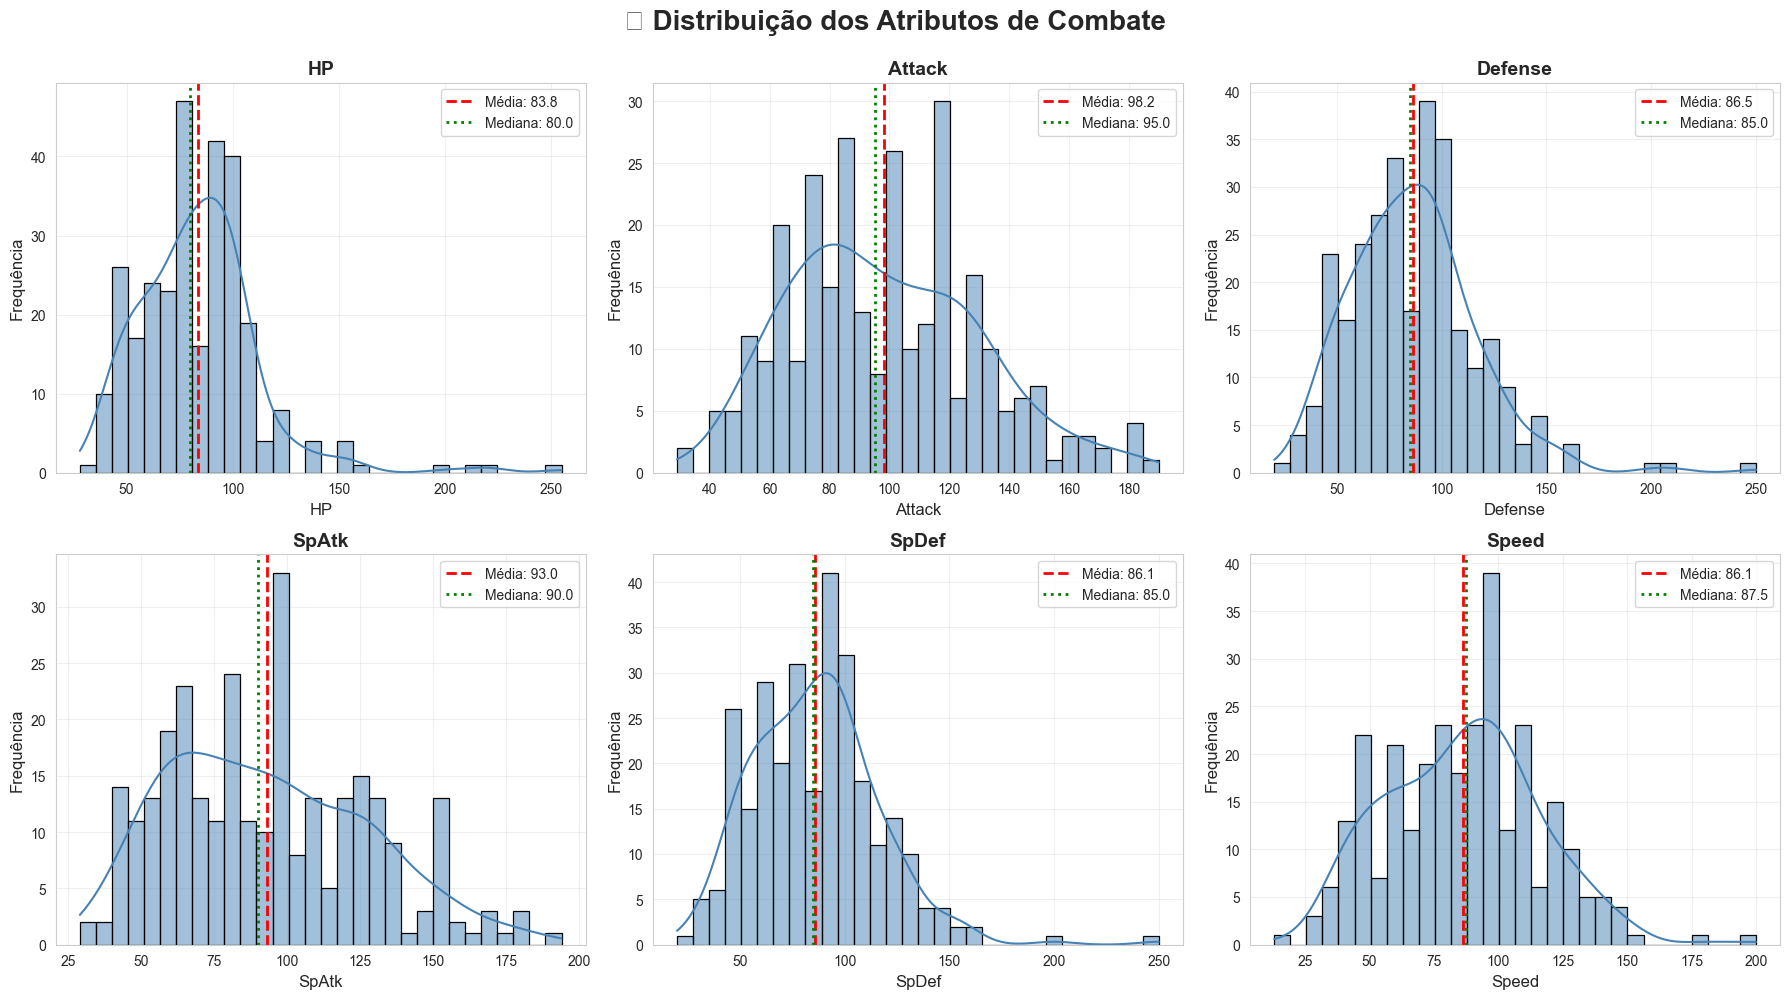


ESTATÍSTICAS DESCRITIVAS - ATRIBUTOS DE COMBATE
           HP  Attack  Defense   SpAtk   SpDef   Speed
count  290.00  290.00   290.00  290.00  290.00  290.00
mean    83.75   98.18    86.47   92.97   86.10   86.14
std     28.99   31.53    30.45   34.10   29.88   29.64
min     28.00   29.00    20.00   29.00   20.00   13.00
25%     65.00   75.00    65.00   65.00   65.00   62.25
50%     80.00   95.00    85.00   90.00   85.00   87.50
75%    100.00  120.00   100.00  120.00  100.00  106.00
max    255.00  190.00   250.00  194.00  250.00  200.00

VISUALIZAÇÃO 2: BST (BASE STAT TOTAL) POR GRUPO


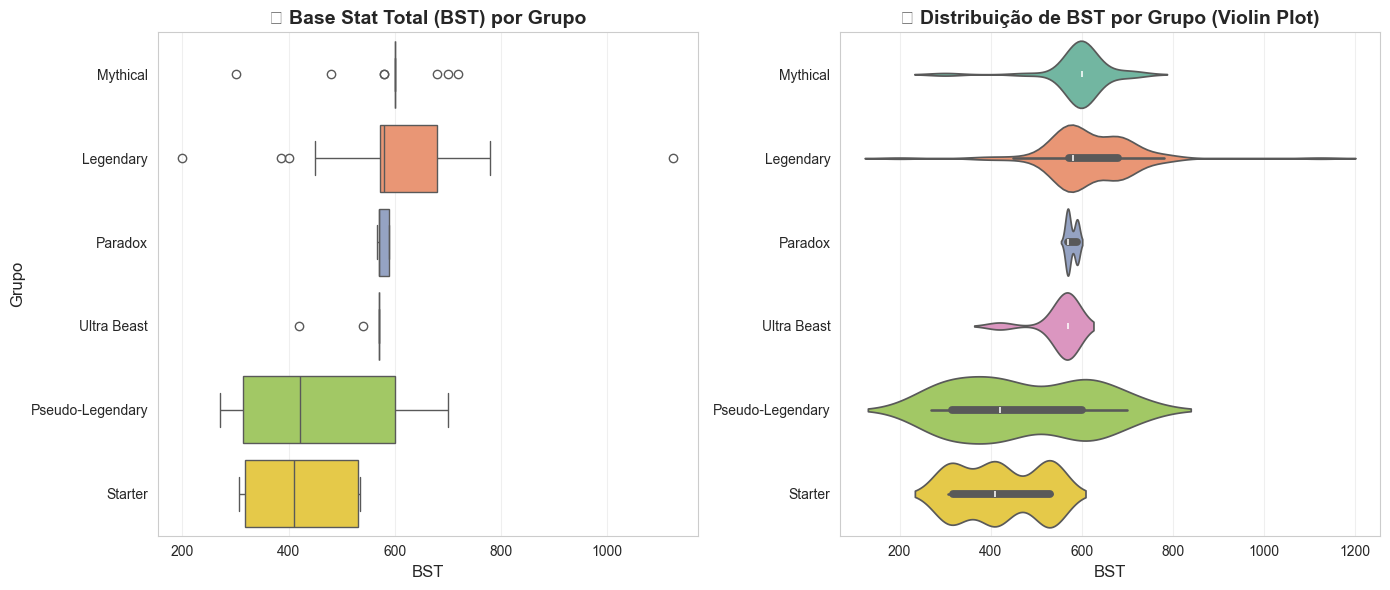


VISUALIZAÇÃO 3: MATRIZ DE CORRELAÇÃO


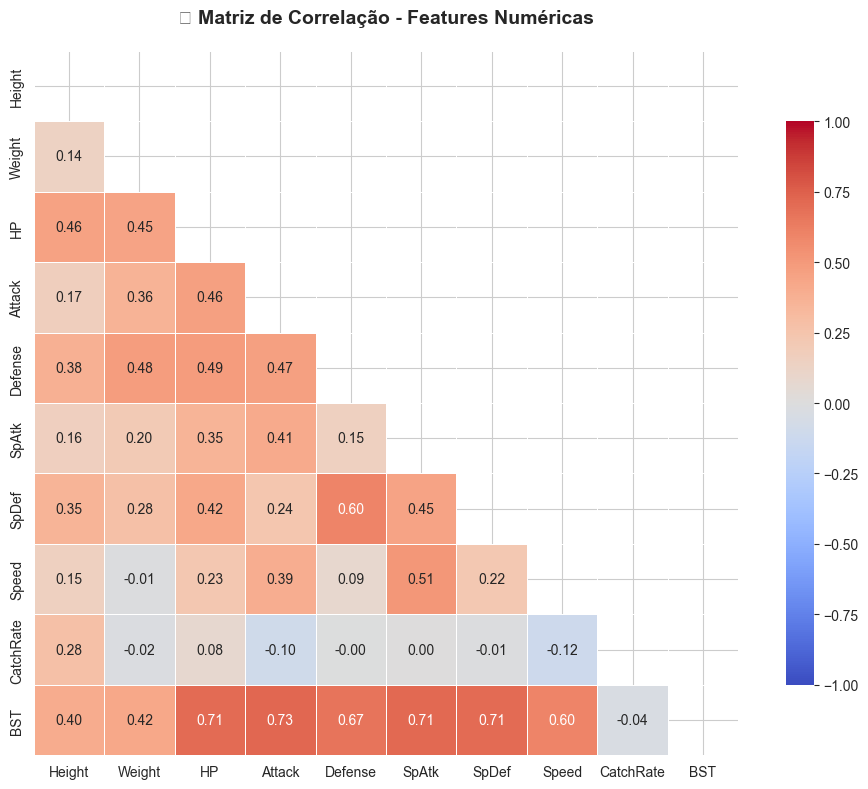


💡 Correlações mais fortes:
   BST ↔ Attack: 0.726
   Attack ↔ BST: 0.726
   SpAtk ↔ BST: 0.713
   BST ↔ SpAtk: 0.713
   HP ↔ BST: 0.709

ESTATÍSTICAS DESCRITIVAS POR GRUPO

📊 HP:
                   mean    std  min  max  count
Group                                          
Legendary         98.67  30.10   43  255    106
Paradox           95.90  22.65   55  154     20
Ultra Beast       91.18  47.72   53  223     11
Mythical          83.71  22.83   46  135     31
Pseudo-Legendary  72.25  22.05   28  115     36
Starter           66.42  17.07   39  110     86

📊 Attack:
                    mean    std  min  max  count
Group                                           
Legendary         110.96  29.69   29  190    106
Ultra Beast       109.55  37.32   53  181     11
Mythical          107.90  28.22   65  180     31
Paradox           103.40  29.37   55  140     20
Pseudo-Legendary   97.72  33.37   50  170     36
Starter            76.43  21.34   40  125     86

📊 Defense:
                   me

In [3]:
# ============================================================================
# VISUALIZAÇÃO 1: Distribuição dos Atributos de Combate
# ============================================================================

print("="*80)
print("VISUALIZAÇÃO 1: DISTRIBUIÇÃO DOS ATRIBUTOS DE COMBATE")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('📊 Distribuição dos Atributos de Combate', fontsize=20, fontweight='bold', y=0.995)

for idx, stat in enumerate(combat_stats):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Histograma com KDE
    sns.histplot(data=df_clean, x=stat, kde=True, bins=30, color='steelblue', ax=ax, edgecolor='black')
    
    # Estatísticas
    mean_val = df_clean[stat].mean()
    median_val = df_clean[stat].median()
    
    # Linhas verticais
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_val:.1f}')
    
    # Configurações
    ax.set_title(f'{stat}', fontsize=14, fontweight='bold')
    ax.set_xlabel(stat, fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ESTATÍSTICAS DESCRITIVAS - ATRIBUTOS DE COMBATE")
print("="*80)
print(df_clean[combat_stats].describe().round(2).to_string())
print("="*80)

# ============================================================================
# VISUALIZAÇÃO 2: BST (Base Stat Total) por Grupo
# ============================================================================

print("\n" + "="*80)
print("VISUALIZAÇÃO 2: BST (BASE STAT TOTAL) POR GRUPO")
print("="*80)

plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
df_clean_sorted = df_clean.sort_values('BST', ascending=False)
groups_ordered = df_clean.groupby('Group')['BST'].median().sort_values(ascending=False).index
sns.boxplot(data=df_clean, y='Group', x='BST', order=groups_ordered, palette='Set2')
plt.title('📦 Base Stat Total (BST) por Grupo', fontsize=14, fontweight='bold')
plt.xlabel('BST', fontsize=12)
plt.ylabel('Grupo', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, y='Group', x='BST', order=groups_ordered, palette='Set2')
plt.title('🎻 Distribuição de BST por Grupo (Violin Plot)', fontsize=14, fontweight='bold')
plt.xlabel('BST', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZAÇÃO 3: Matriz de Correlação
# ============================================================================

print("\n" + "="*80)
print("VISUALIZAÇÃO 3: MATRIZ DE CORRELAÇÃO")
print("="*80)

plt.figure(figsize=(10, 8))
corr = df_clean[numeric_features + ['CatchRate', 'BST']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, center=0,
            square=True, vmin=-1, vmax=1)
plt.title('🔥 Matriz de Correlação - Features Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Correlações mais fortes:")
corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
corr_sorted = corr_pairs.abs().sort_values(ascending=False)
for (var1, var2), corr_value in corr_sorted.head(5).items():
    actual_corr = corr_pairs[(var1, var2)]
    print(f"   {var1} ↔ {var2}: {actual_corr:.3f}")

# ============================================================================
# ANÁLISE ESTATÍSTICA: Comparação entre Grupos
# ============================================================================

print("\n" + "="*80)
print("ESTATÍSTICAS DESCRITIVAS POR GRUPO")
print("="*80)

for feature in ['HP', 'Attack', 'Defense', 'Speed', 'BST']:
    print(f"\n📊 {feature}:")
    stats_by_group = df_clean.groupby('Group')[feature].agg(['mean', 'std', 'min', 'max', 'count'])
    stats_by_group = stats_by_group.sort_values('mean', ascending=False)
    print(stats_by_group.round(2).to_string())

# ============================================================================
# TESTE ANOVA: Diferenças Significativas entre Grupos
# ============================================================================

print("\n" + "="*80)
print("TESTE ANOVA - DIFERENÇAS ENTRE GRUPOS")
print("="*80)
print("\nHipótese Nula (H0): As médias dos grupos são iguais")
print("Hipótese Alternativa (H1): Pelo menos uma média é diferente")
print("Nível de significância: α = 0.05")
print("-"*80)

for feature in ['Attack', 'Defense', 'Speed', 'HP', 'BST']:
    grupos = [group[feature].values for name, group in df_clean.groupby('Group')]
    f_stat, p_val = f_oneway(*grupos)
    
    print(f"\n{feature}:")
    print(f"   F-Statistic: {f_stat:.4f}")
    print(f"   P-Valor: {p_val:.4e}")
    
    if p_val < 0.05:
        print(f"   ✅ Diferença SIGNIFICATIVA entre grupos (p < 0.05)")
    else:
        print(f"   ❌ Diferença NÃO significativa (p ≥ 0.05)")

print("\n" + "="*80)

---

### 2.2 Análise de Tipos de Pokémon

Exploração dos tipos primários e secundários, identificando combinações mais comuns e características de cada tipo.

ANÁLISE DE TIPOS PRIMÁRIOS E SECUNDÁRIOS

📌 Top 10 Tipos Primários mais comuns:
Grass          :  39 (13.45%) ██████
Water          :  39 (13.45%) ██████
Dragon         :  37 (12.76%) ██████
Fire           :  36 (12.41%) ██████
Psychic        :  30 (10.34%) █████
Steel          :  16 ( 5.52%) ██
Dark           :  13 ( 4.48%) ██
Electric       :  12 ( 4.14%) ██
Rock           :  12 ( 4.14%) ██
Fighting       :  11 ( 3.79%) █

📌 Pokémon com tipo secundário: 173 (59.7%)
📌 Pokémon com apenas um tipo: 117 (40.3%)

VISUALIZAÇÃO 4: ATRIBUTOS MÉDIOS POR TIPO PRIMÁRIO


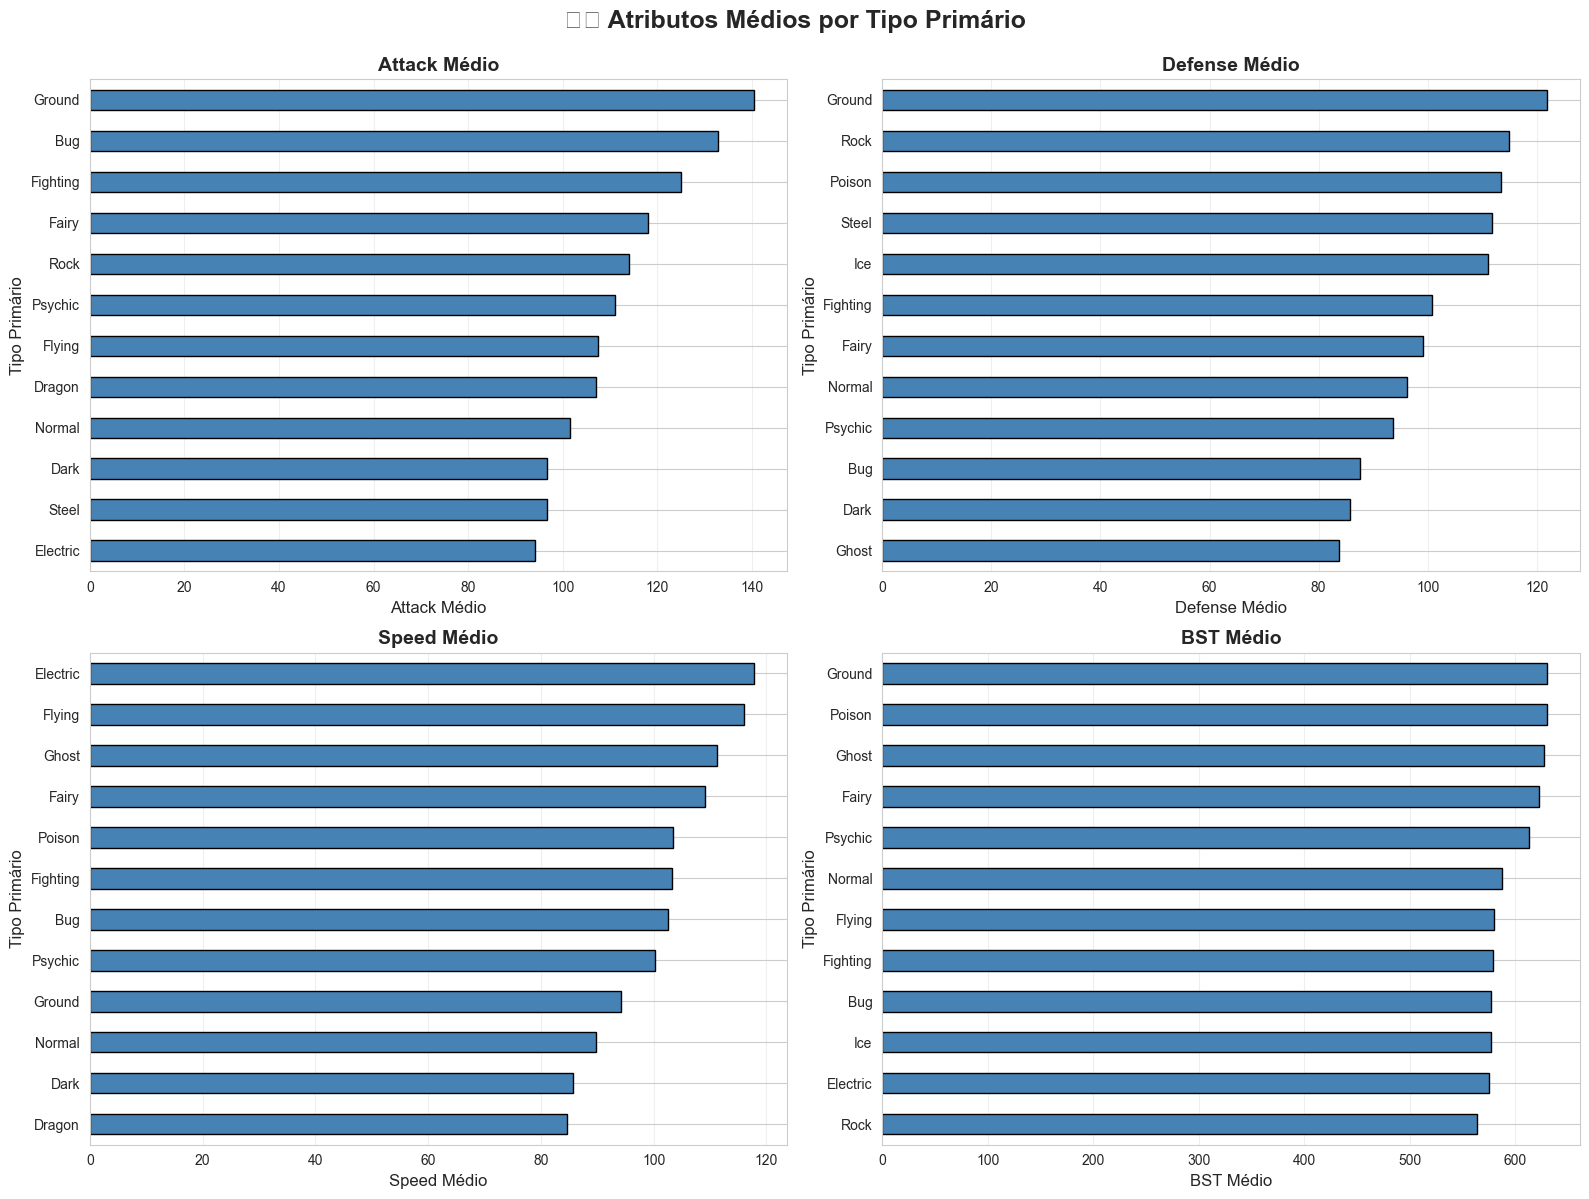

In [4]:
# ============================================================================
# ANÁLISE DE TIPOS DE POKÉMON
# ============================================================================

print("="*80)
print("ANÁLISE DE TIPOS PRIMÁRIOS E SECUNDÁRIOS")
print("="*80)

# Tipos primários
print("\n📌 Top 10 Tipos Primários mais comuns:")
primary_types = df_clean['Primary Type'].value_counts().head(10)
for tipo, count in primary_types.items():
    percentage = (count / len(df_clean)) * 100
    bar = "█" * int(percentage / 2)
    print(f"{tipo:15s}: {count:3d} ({percentage:5.2f}%) {bar}")

# Tipos secundários (excluindo nulos)
print(f"\n📌 Pokémon com tipo secundário: {df_clean['Secondary Type'].notna().sum()} ({df_clean['Secondary Type'].notna().sum() / len(df_clean) * 100:.1f}%)")
print(f"📌 Pokémon com apenas um tipo: {df_clean['Secondary Type'].isna().sum()} ({df_clean['Secondary Type'].isna().sum() / len(df_clean) * 100:.1f}%)")

# Visualização: Top tipos por atributo médio
print("\n" + "="*80)
print("VISUALIZAÇÃO 4: ATRIBUTOS MÉDIOS POR TIPO PRIMÁRIO")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('⚔️ Atributos Médios por Tipo Primário', fontsize=18, fontweight='bold', y=0.995)

stats_to_plot = ['Attack', 'Defense', 'Speed', 'BST']

for idx, stat in enumerate(stats_to_plot):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Top 12 tipos por média
    type_stats = df_clean.groupby('Primary Type')[stat].mean().sort_values(ascending=False).head(12)
    
    type_stats.plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')
    ax.set_title(f'{stat} Médio', fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{stat} Médio', fontsize=12)
    ax.set_ylabel('Tipo Primário', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n" + "="*80)

---

### 2.3 Análise de Taxa de Captura (CatchRate)

Investigação dos fatores que influenciam a dificuldade de captura de Pokémon.

ANÁLISE DA TAXA DE CAPTURA

📊 Estatísticas Descritivas de CatchRate:
count    290.000000
mean      33.893103
std       45.697353
min        3.000000
25%        3.000000
50%       45.000000
75%       45.000000
max      255.000000

VISUALIZAÇÃO 5: ANÁLISE DA TAXA DE CAPTURA


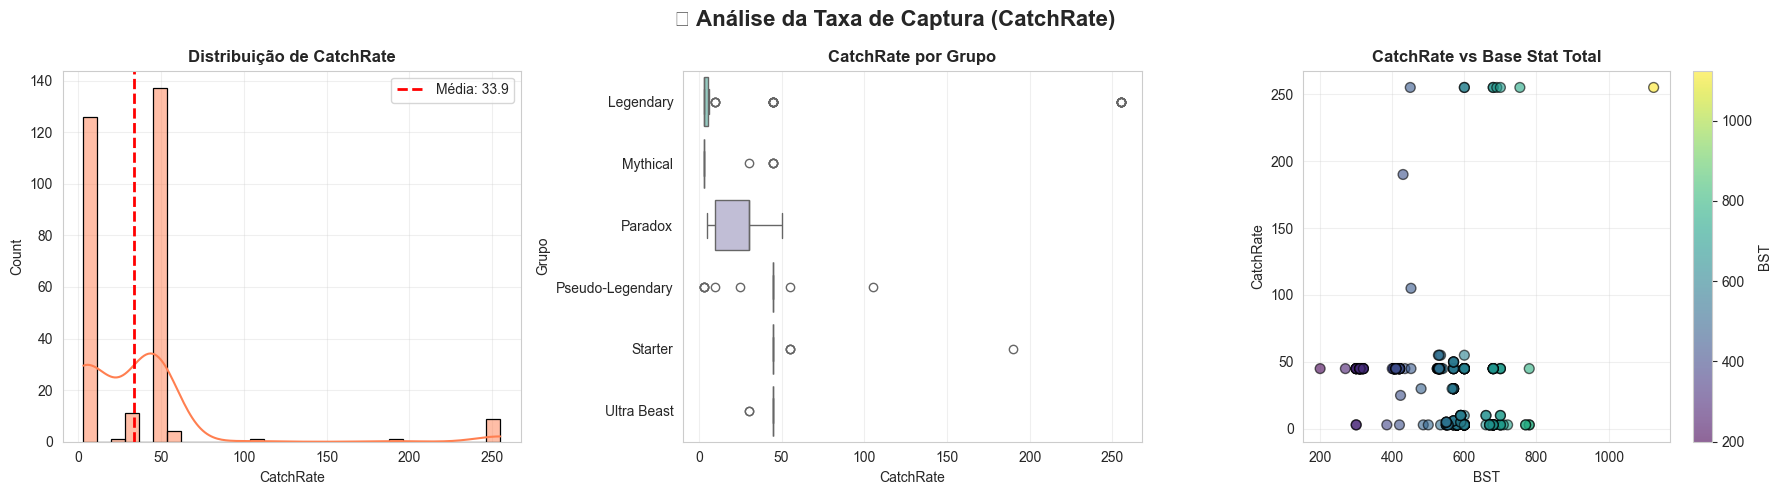


🔍 Correlação de CatchRate com atributos:
   HP             : +0.078  ↑ Positiva
   SpAtk          : +0.000  ↑ Positiva
   Defense        : -0.005  ↓ Negativa
   SpDef          : -0.013  ↓ Negativa
   BST            : -0.038  ↓ Negativa
   Attack         : -0.101  ↓ Negativa
   Speed          : -0.115  ↓ Negativa

📊 CatchRate Médio por Grupo:
                   mean    std  min  max
Group                                   
Starter           47.03  15.71   45  190
Ultra Beast       42.27   6.07   30   45
Pseudo-Legendary  40.75  18.31    3  105
Legendary         28.81  70.29    3  255
Paradox           25.50  15.97    5   50
Mythical           9.29  14.79    3   45

💡 Interpretação:
   • CatchRate mais ALTO = Mais FÁCIL de capturar
   • CatchRate mais BAIXO = Mais DIFÍCIL de capturar
   • Pokémon lendários geralmente têm CatchRate muito baixo



In [5]:
# ============================================================================
# ANÁLISE DE TAXA DE CAPTURA (CatchRate)
# ============================================================================

print("="*80)
print("ANÁLISE DA TAXA DE CAPTURA")
print("="*80)

# Estatísticas gerais
print(f"\n📊 Estatísticas Descritivas de CatchRate:")
print(df_clean['CatchRate'].describe().to_string())

# Visualizações
print("\n" + "="*80)
print("VISUALIZAÇÃO 5: ANÁLISE DA TAXA DE CAPTURA")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('🎯 Análise da Taxa de Captura (CatchRate)', fontsize=16, fontweight='bold')

# 1. Distribuição geral
ax1 = axes[0]
sns.histplot(data=df_clean, x='CatchRate', bins=30, kde=True, color='coral', ax=ax1, edgecolor='black')
ax1.axvline(df_clean['CatchRate'].mean(), color='red', linestyle='--', linewidth=2, label=f"Média: {df_clean['CatchRate'].mean():.1f}")
ax1.set_title('Distribuição de CatchRate', fontsize=12, fontweight='bold')
ax1.set_xlabel('CatchRate')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. CatchRate por Grupo
ax2 = axes[1]
groups_ordered = df_clean.groupby('Group')['CatchRate'].median().sort_values().index
sns.boxplot(data=df_clean, y='Group', x='CatchRate', order=groups_ordered, palette='Set3', ax=ax2)
ax2.set_title('CatchRate por Grupo', fontsize=12, fontweight='bold')
ax2.set_xlabel('CatchRate')
ax2.set_ylabel('Grupo')
ax2.grid(axis='x', alpha=0.3)

# 3. Relação CatchRate vs BST
ax3 = axes[2]
scatter = ax3.scatter(df_clean['BST'], df_clean['CatchRate'], 
                      c=df_clean['BST'], cmap='viridis', alpha=0.6, edgecolors='black', s=50)
ax3.set_title('CatchRate vs Base Stat Total', fontsize=12, fontweight='bold')
ax3.set_xlabel('BST')
ax3.set_ylabel('CatchRate')
ax3.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='BST')

plt.tight_layout()
plt.show()

# Correlação com atributos
print(f"\n🔍 Correlação de CatchRate com atributos:")
catchrate_corr = df_clean[combat_stats + ['BST', 'CatchRate']].corr()['CatchRate'].sort_values(ascending=False)
for attr, corr_val in catchrate_corr.items():
    if attr != 'CatchRate':
        direction = "↑ Positiva" if corr_val > 0 else "↓ Negativa"
        print(f"   {attr:15s}: {corr_val:+.3f}  {direction}")

# CatchRate médio por grupo
print(f"\n📊 CatchRate Médio por Grupo:")
catchrate_by_group = df_clean.groupby('Group')['CatchRate'].agg(['mean', 'std', 'min', 'max'])
catchrate_by_group = catchrate_by_group.sort_values('mean', ascending=False)
print(catchrate_by_group.round(2).to_string())

print("\n💡 Interpretação:")
print("   • CatchRate mais ALTO = Mais FÁCIL de capturar")
print("   • CatchRate mais BAIXO = Mais DIFÍCIL de capturar")
print("   • Pokémon lendários geralmente têm CatchRate muito baixo")

print("\n" + "="*80)

---

## 3. Resumo da Análise Exploratória

### Principais Descobertas

**📊 Distribuições e Estatísticas:**
- Os atributos de combate seguem distribuições aproximadamente normais
- Existe grande variabilidade nos stats entre diferentes Pokémon
- Base Stat Total (BST) varia significativamente entre grupos

**🔥 Correlações Importantes:**
- Atributos de ataque e defesa tendem a estar correlacionados
- BST tem forte correlação com todos os atributos individuais
- CatchRate apresenta correlação negativa com BST (quanto mais forte, mais difícil de capturar)

**⚔️ Diferenças entre Grupos:**
- Pokémon Lendários possuem stats significativamente superiores
- Starters apresentam distribuições balanceadas
- Testes ANOVA confirmam diferenças estatisticamente significativas entre grupos

**🎯 Taxa de Captura:**
- CatchRate inversamente proporcional ao poder do Pokémon
- Grupos raros (Legendary, Mythical) têm CatchRate muito baixo
- Forte correlação negativa com BST

---

### 📝 Próximos Passos - Modelagem Preditiva

✅ **Análise Exploratória Concluída** → Próxima etapa: `modelagem.ipynb`

O notebook de modelagem implementa os seguintes modelos de Machine Learning:

**1. Regressão (Prever CatchRate)**:
- ✓ **OLS (Ordinary Least Squares)** com diagnóstico completo
  - Summary estatístico com p-valores e coeficientes
  - Análise de VIF (multicolinearidade)
  - Diagnóstico de resíduos (homocedasticidade e normalidade)
  - Teste de Shapiro-Wilk para validação de normalidade
  
- ✓ **Regressão Polinomial** (grau 2)
  - Captura relações não-lineares entre features
  - Comparação de R² com modelo linear

**2. Classificação Multiclasse (Prever Group)**:
- ✓ **Random Forest Classifier**
  - 200 árvores com classe balanceada
  - StandardScaler para normalização
  - LabelEncoder para variável target
  - Split estratificado (80/20)
  
- ✓ **Avaliação Detalhada**:
  - Classification Report (Precision, Recall, F1-Score por grupo)
  - Matriz de Confusão visual com nomes dos grupos
  - Análise de importância das features
  - Identificação de confusões comuns entre grupos

**3. Otimização Automática com PyCaret**:
- ✓ Comparação de múltiplos algoritmos automaticamente
- ✓ Seleção do melhor modelo por F1-Score
- ✓ Hyperparameter tuning com validação cruzada
- ✓ Fix de desbalanceamento de classes

---

**🎓 Dataset analisado! Agora é possível construir e avaliar modelos preditivos em `modelagem.ipynb`**